# **Simple Pendulum**


Purpose of this section is to

1. Observe the relationship between the length and period of a pendulum.
2. Experimentally determine the value of the acceleration due to gravity, *g*.

Compare the theoretical and computational values you have calculated.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize

In [12]:
filename = 'C:\\Users\\jvarela\\Documents\\Python_Projects\\SimplePendulum\\averagedperiodlength.xlsx' # class data

In [20]:
# DO NOT EDIT
length_time_data = pd.read_excel(filename, sheet_name = 'Sheet1')
length_time_data

,l (m),t_10 (s),t (s)
0,0.73,17.520000,1.750000
1,0.97,19.673333,1.963333
2,0.22,9.553333,0.956667
3,0.18,8.156667,0.815667
4,0.79,16.903333,1.690333
...,...,...,...
97,0.68,16.483333,1.648333
98,0.76,17.896667,1.789667
99,0.84,19.196667,1.919667
100,0.56,15.876667,1.587667


In [21]:
# Viewing imported dataset directly from the google sheets
length_time_data= length_time_data.sort_values(by='l (m)', ascending=True)
length_time_data

,l (m),t_10 (s),t (s)
87,0.10,6.353333,0.635333
73,0.11,6.996667,0.699667
9,0.12,7.586667,0.758667
20,0.12,6.780000,0.678000
70,0.15,9.243333,NaN
...,...,...,...
39,0.94,19.256667,1.925667
45,0.95,NaN,NaN
1,0.97,19.673333,1.963333
74,0.98,19.556667,1.955667


Calculating the period squared values for the data, $T^2$.

In [22]:
# Calculate T^2 values and insert into the pandas DataFrame
length_time_data.insert(2,'t^2 (s^2)',length_time_data['t (s)']**2)

Cleaning the data, getting rid of any rows which may contain period and/or period squared values of 0 for any reason.

**Do not edit the below code cell**

In [23]:
# Removing rows which contain any 0 values or missing (NaN) values
length_time_data = length_time_data.drop(
    length_time_data[length_time_data['t^2 (s^2)'] == 0].index |
    length_time_data[length_time_data['l (m)'] == 0].index |
    length_time_data[length_time_data['t (s)'] == 0].index
    )

length_time_data = length_time_data.dropna()

In [24]:
# Viewing revised dataset
length_time_data

,l (m),t_10 (s),t^2 (s^2),t (s)
87,0.10,6.353333,0.403648,0.635333
73,0.11,6.996667,0.489533,0.699667
9,0.12,7.586667,0.575575,0.758667
20,0.12,6.780000,0.459684,0.678000
82,0.15,8.123333,0.659885,0.812333
...,...,...,...,...
43,0.93,20.026667,4.010674,2.002667
39,0.94,19.256667,3.708192,1.925667
1,0.97,19.673333,3.854678,1.963333
74,0.98,19.556667,3.824632,1.955667


The equation for the period, *T*, of a simple pendulum has the form

## $T=2\pi\sqrt{\frac{L}{g}}$

where *L* is the length of the pendulum.

Using this equation and your dataset, it is possible to experimentally determine *g*.


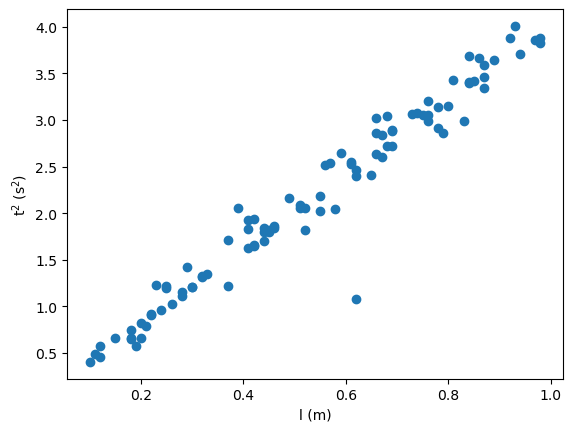

In [25]:
# Select length & T squared values from the dataset
length = length_time_data['l (m)']
t_squared = length_time_data['t^2 (s^2)']

# Plotting period squared as a function of length
plt.xlabel('l (m)')
plt.ylabel('t$^2$ (s$^2$)')
plt.scatter(length, t_squared)
plt.show()

After visualizing $T^2$ vs $L$, it is possible to get an expression for $g$ from the line of best fit for the plot. If it isn't clear, write out the expression of $T^2(L)$ and see where $g$ lies in the equation.

**Will be using the polyfit function from the Numpy library, that we have used in past labs.**

**Documentation of np.polyfit:
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html**

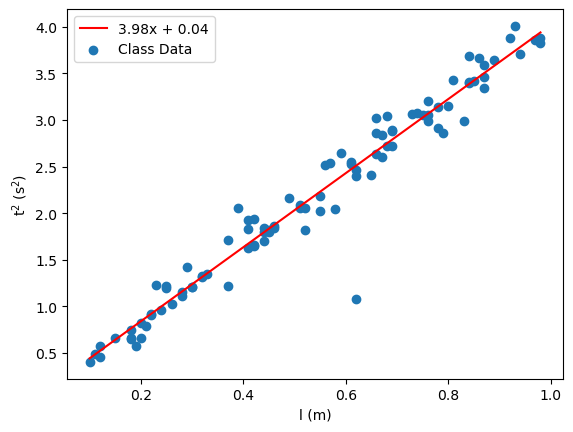

In [26]:
# Create a linear fit to the T^2 and L plot

fit_coef = np.polyfit(length, t_squared,1)  # use np.polyfit function
fit_func = fit_coef[0]*length + fit_coef[1]# write the expression for the fit model using the fit coefficients in fit_coef (note: linear equation, so an order 1 polynomial)

# Plot both the fit and the data points on the same axis
plt.xlabel('l (m)')
plt.ylabel('t$^2$ (s$^2$)')
plt.plot(length, fit_func,'r',label='{}x + {}'.format(
    round(fit_coef[0],2),round(fit_coef[1],2)))
plt.scatter(length, t_squared,label = 'Class Data')
plt.legend(loc='best')
plt.show()

Calculate an experimental value of $g$ using the slope of the line of best fit.

After calculating the experimental value of $g$, it is now possible to compare to the theoretical value of $9.81 m/s^2$ via a percent error calculation.

In [27]:
# Experimentally determine g and quantitatively compare it the theoretical value

g_exp  = (4*np.pi**2)/fit_coef[0]
print(g_exp)

g_theo = 9.81 #theoretical value of g, in units of m/s^2

percent_err = (np.abs(g_exp-g_theo)/g_theo) * 100
print(percent_err)


9.92902239253863
1.2132761726669747


Now it is time to analyze the data from Vernier Video Analysis, in order to construct a plot of $\theta$ vs $t$. From this plot you will be able to fit a sinusoidal function and determine an experimental value of the period, $T_{calc}$. This calculated value can be compared to the period you measured earlier in the lab for this length, $T_{meas}$.

First you need to extract the polar data from Vernier, and load the data into this workspace below.

In [30]:
filename2 = 'C:\\Users\\jvarela\\Documents\\Python_Projects\\SimplePendulum\\verniervideodata.xlsx'
vernier_data = pd.read_excel(filename2, sheet_name = 'Sheet1')

In [32]:
vernier_data['theta (rad)'] = np.arctan2(vernier_data['X (m)'], -vernier_data['Y (m)'])
vernier_data['theta (deg)'] = np.degrees(vernier_data['theta (rad)'])

With this new dataset, you should now construct the plot of $\theta$ vs $t$.

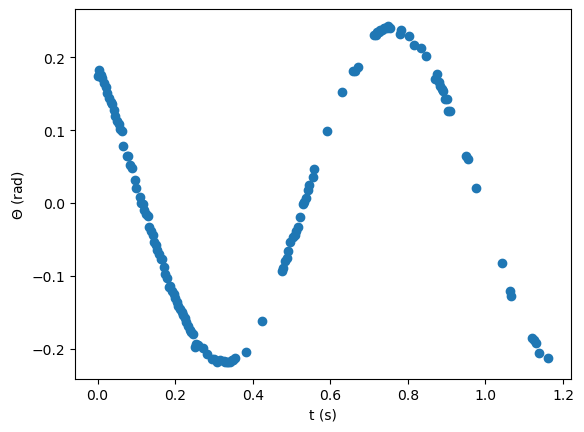

In [33]:
time = vernier_data['Time (s)']
theta = vernier_data['theta (rad)']
plt.xlabel('t (s)')
plt.ylabel('$\Theta$ (rad)')
plt.scatter(time, theta)
plt.show()

With the plot constructed, it's time to fit the data with a sinusoidal function which will have the form

$θ = \theta_{max}*sin(\omega*t + \phi)$

where $\theta_{max}$ is the max angle, $\omega$ is the angular frequency, and $\phi$ is the phase constant.  

Below this fit is constructed through the use the scipy function optimize.curve_fit, which calculates the parameter values needed to fit your specific dataset of $\theta$ and $t$.

**Documentation for the optimize.curve_fit func in Scipy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html**

In [42]:
# Fitting a sinusoid function to our theta vs time data
def sin_func(x_data,theta_max, omega, phi):
    return theta_max * np.sin(omega * x_data + phi)

initial_guess = [(np.max(theta) - np.min(theta))/ 2, 7, 0.0] #if needed

params, params_covariance = optimize.curve_fit(sin_func, time, theta,p0=initial_guess)
# if a runtime error appears, try giving curve_fit an estimate on the parameters with the p0 argument

print(params)

fit_func2 = params[0] * np.sin(params[1] * time + params[2])

[-0.23093841  7.28103031 -0.83534901]


Plot the sinusoidal fit, with the parameters calculated above, alongside your data.

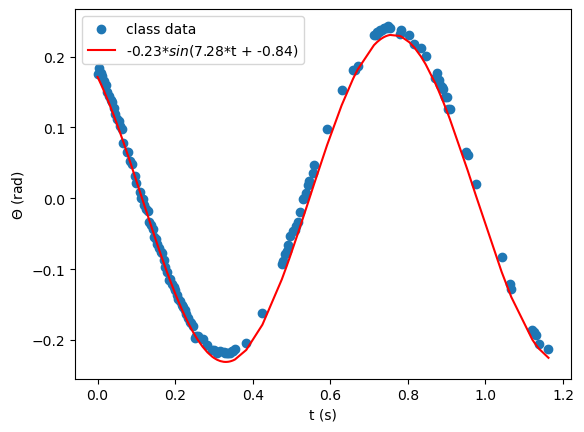

In [43]:
# Plotting the fit against the data

plt.scatter(time, theta,label='class data')
plt.plot(time,fit_func2,'r',label='{}*$sin$({}*t + {})'.format(
    round(params[0],2),round(params[1],2),round(params[2],2)))
plt.xlabel('t (s)')
plt.ylabel('$\Theta$ (rad)')
plt.legend(loc='best')
plt.show()

From this fit, extract the value for the angular frequency and calculate the period. Quantitatively compare this calculated value of period, $T_{calc}$, to the period you measured earlier in the lab, $T_{meas}$, for this specific pendulum length that is shown in the video. Compare the two values via a percent error calculation.

The relationship between $T$ and $ω$ is

$T = \frac{2π}{ω}$.

In [ ]:
ang_freq = params[1] #rad/s
period_calc = (2*np.pi)/ang_freq
print(period_calc)
period_meas = 0.85 # determined via the vernier file

percent_err2 = (np.abs(period_calc-period_meas)/period_calc) * 100
print(percent_err)

0.862952774716413
1.2132761726669747


# **Dampened Pendulum**

[Pendulum damped by air notes](https://web.physics.ucsb.edu/~lecturedemonstrations/Composer/Pages/40.37.html)

Equation for regular pendulum

$θ = \theta_{max}*sin(\omega*t + \phi)$

where $\theta_{max}$ is the max angle, $\omega$ is the angular frequency, and $\phi$ is the phase constant.

Equation for underdamped dampened pendulum ($β = \frac{λ}{2} = \frac{c}{2m} < ω$) is

$θ(t) = Ae^{-βt}*cos(w_0t - ϕ)$

where $w_0 = \sqrt(\omega^2 - β^2)$, $ϕ$ is a phase constant, and $A$ is amplitude.

Will assume $ϕ=0$.

<>:11: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-3256499519.py:11: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel('$\Theta$ (rad)')


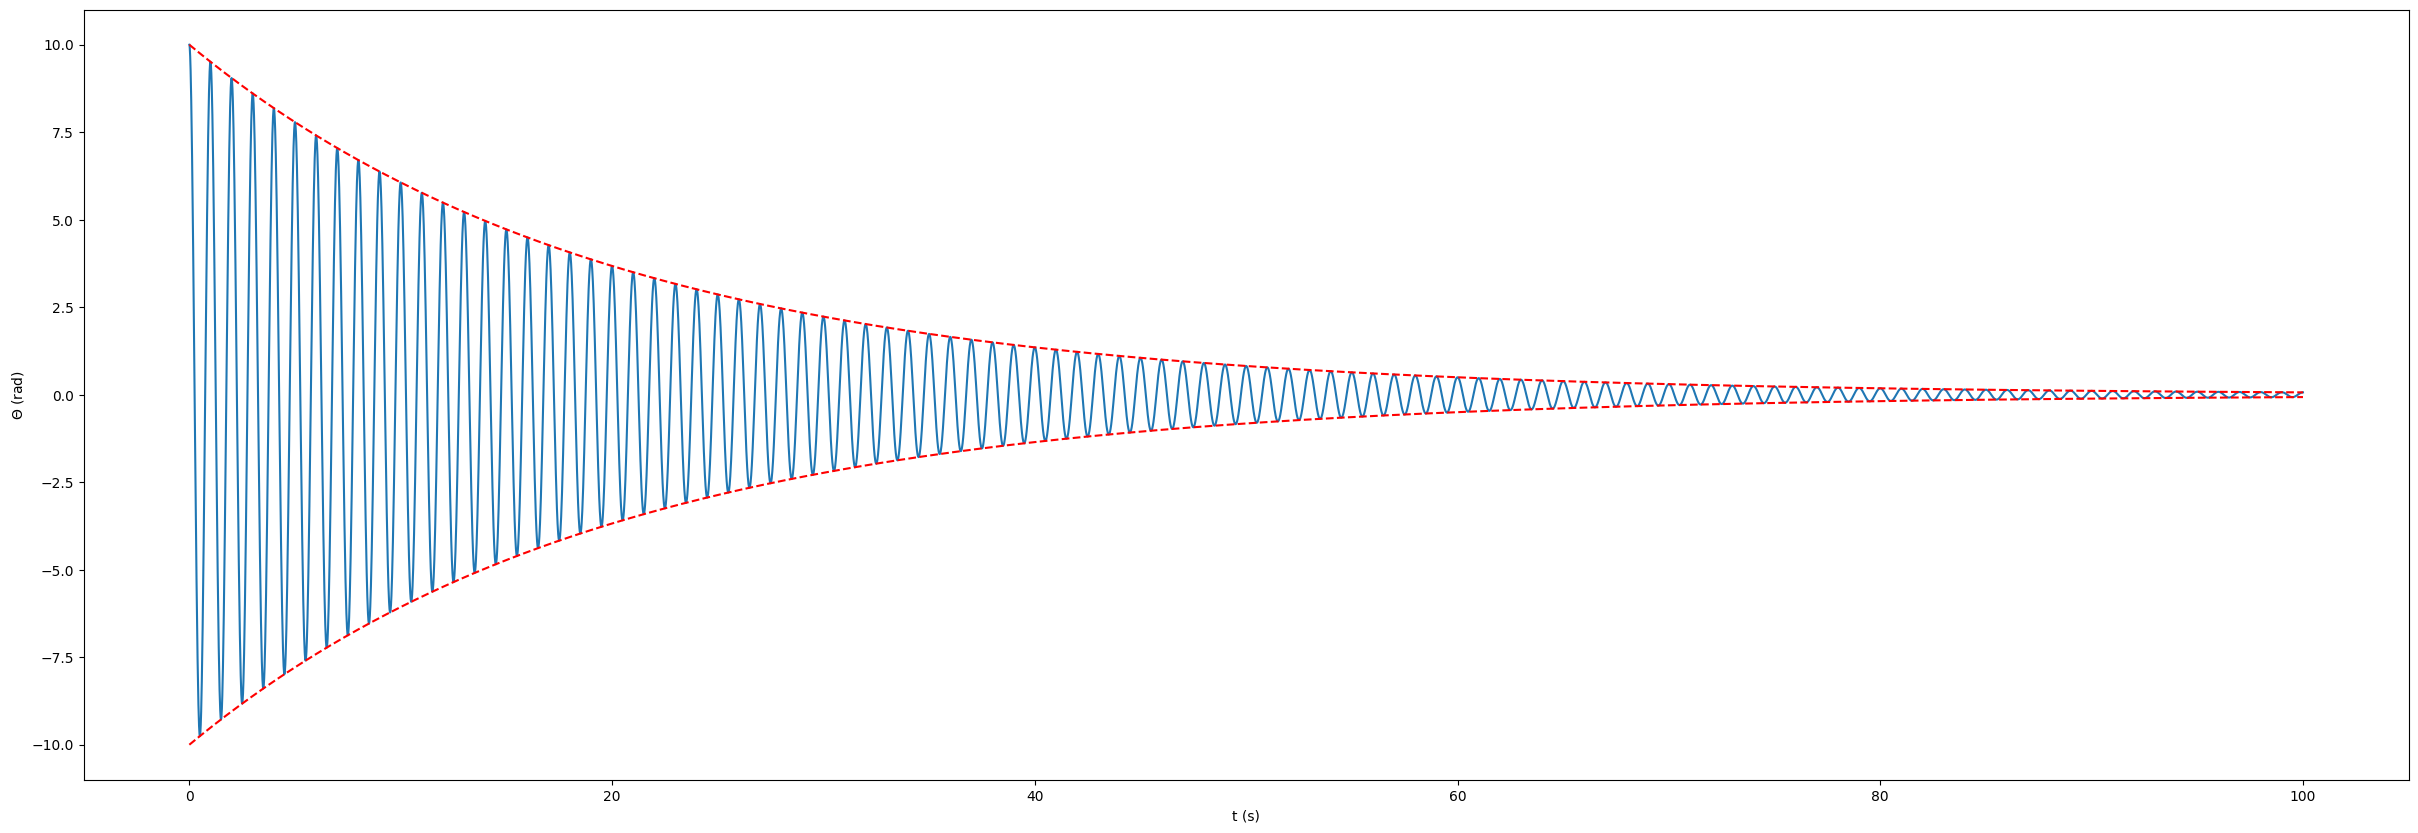

In [ ]:
t_data = np.linspace(0,100,10000) # generated time data

coefs = {'beta':0.05, 'omega': 2*np.pi, 'amp':10}
theta_data = coefs['amp'] * np.exp(-coefs['beta']*t_data) * np.cos(np.sqrt(coefs['omega']**2 - coefs['beta']**2)*t_data)

fig = plt.figure(figsize=(30, 10))
plt.plot(t_data, theta_data)
plt.plot(t_data, coefs['amp'] * np.exp(-coefs['beta']*t_data),'--',c='r')
plt.plot(t_data, -coefs['amp'] * np.exp(-coefs['beta']*t_data),'--',c='r')
plt.xlabel('t (s)')
plt.ylabel('$\Theta$ (rad)')
plt.show()

# **Driven Pendulum**

[Pendulum damped by air notes](https://web.physics.ucsb.edu/~lecturedemonstrations/Composer/Pages/40.37.html)

Equation for regular pendulum

$θ = \theta_{max}*sin(\omega*t + \phi)$

where $\theta_{max}$ is the max angle, $\omega$ is the angular frequency, and $\phi$ is the phase constant.

Equation for underdamped dampened pendulum ($β = \frac{λ}{2} = \frac{c}{2m} < ω$) is

$θ(t) = Ae^{-βt}*cos(w_0t - ϕ)$

where $w_0 = \sqrt(\omega^2 - β^2)$, $ϕ$ is a phase constant, and $A$ is amplitude.

Will assume $ϕ=0$.

<>:11: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-3256499519.py:11: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel('$\Theta$ (rad)')


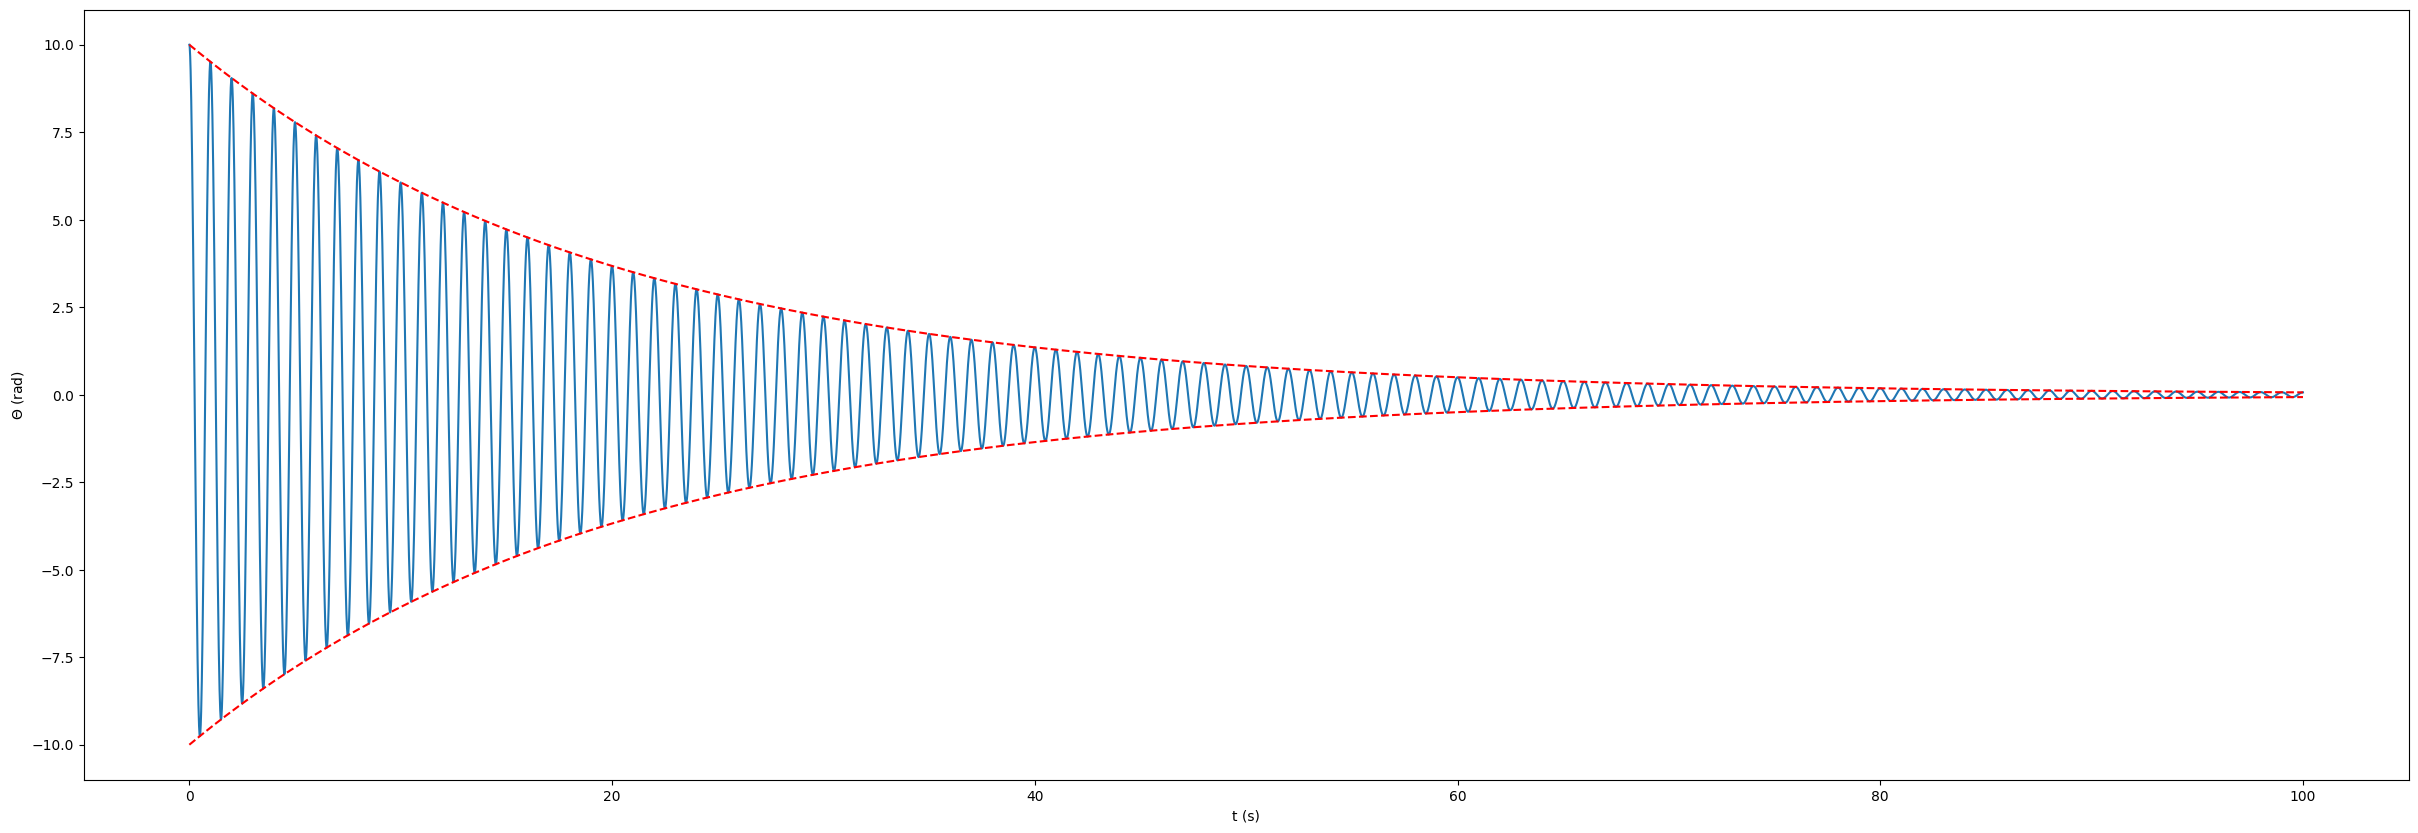

In [ ]:
t_data = np.linspace(0,100,10000) # generated time data

coefs = {'beta':0.05, 'omega': 2*np.pi, 'amp':10}
theta_data = coefs['amp'] * np.exp(-coefs['beta']*t_data) * np.cos(np.sqrt(coefs['omega']**2 - coefs['beta']**2)*t_data)

fig = plt.figure(figsize=(30, 10))
plt.plot(t_data, theta_data)
plt.plot(t_data, coefs['amp'] * np.exp(-coefs['beta']*t_data),'--',c='r')
plt.plot(t_data, -coefs['amp'] * np.exp(-coefs['beta']*t_data),'--',c='r')
plt.xlabel('t (s)')
plt.ylabel('$\Theta$ (rad)')
plt.show()

# **Double Pendulum**

**Code from [Scientific Programming with Python](https://scipython.com/blog/the-double-pendulum/)**

**Example code at [Matplotlib website](https://matplotlib.org/stable/gallery/animation/double_pendulum.html)**

**[Solving for eqs. of motion for double pendulum](https://physics.umd.edu/hep/drew/pendulum2.html)**

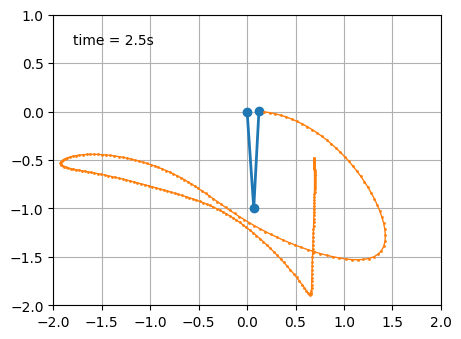

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin

import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
L = L1 + L2  # maximal length of the combined pendulum
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 2.5  # how many seconds to simulate
history_len = 500  # how many trajectory points to display


def derivs(t, state):
    dydx = np.zeros_like(state)

    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return dydx

# create a time array from 0..t_stop sampled at 0.02 second steps
dt = 0.01
t = np.arange(0, t_stop, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate the ODE using Euler's method
y = np.empty((len(t), 4))
y[0] = state
for i in range(1, len(t)):
    y[i] = y[i - 1] + derivs(t[i - 1], y[i - 1]) * dt

# A more accurate estimate could be obtained e.g. using scipy:
#
#   y = scipy.integrate.solve_ivp(derivs, t[[0, -1]], state, t_eval=t).y.T

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, 1.))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    history_x = x2[:i]
    history_y = y2[:i]

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text


ani = animation.FuncAnimation(
    fig, animate, len(y), interval=dt*1000, blit=True)
#plt.show()
ani.save('double_pen_sim.gif', writer='pillow', fps=20)